Enter the number of states in the NFA: 3
State 1: A
State 2: B
State 3: C
Enter the number of symbols in the alphabet of the NFA: 2
Symbol 1: 0
Symbol 2: 1
Enter transitions for each state and symbol [use hyphen for no transition, and separate multiple states (if there) with spaces]:
State A, Symbol 0: A
State A, Symbol 1: A B
State B, Symbol 0: C
State B, Symbol 1: C
State C, Symbol 0: -
State C, Symbol 1: -
Enter the start state: A
Enter the number of final states: 1
Enter final state: C

DFA States and Transitions:
DFA State 1: {A}
  On '0': {A}
  On '1': {A, B}
DFA State 2: {A, B}
  On '0': {A, C}
  On '1': {A, B, C}
DFA State 3: {A, C}
  On '0': {A}
  On '1': {A, B}
DFA State 4: {A, B, C}
  On '0': {A, C}
  On '1': {A, B, C}

DFA Final States:
State 3
State 4


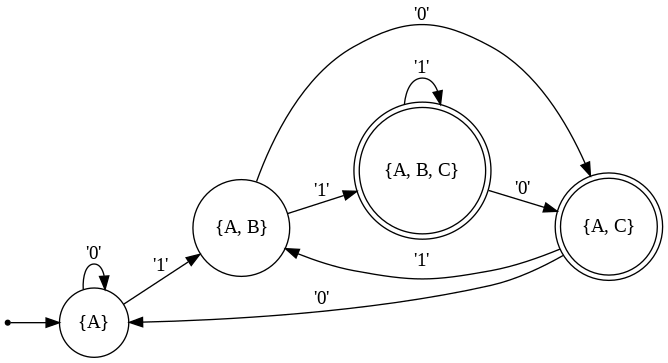

In [2]:
import graphviz
import os
from IPython.display import Image, display
class StateSet:
    def __init__(self):
        self.states = []
        self.count = 0
    def add_state(self, state):
        if state not in self.states:
            self.states.append(state)
            self.count += 1
    def __str__(self, state_names):
        return '{' + ', '.join(state_names[state] for state in self.states) + '}'
    def __eq__(self, other):
        return set(self.states) == set(other.states)
def find_state_set(sets, target):
    for idx, state_set in enumerate(sets):
        if state_set == target:
            return idx
    return -1
def is_final_state(state_set, final_states):
    return any(state in final_states for state in state_set.states)
def dfa_to_dot(dfa_states, dfa_transitions, state_names, symbols, final_states_indices):
    graph = graphviz.Digraph(format='png', engine='dot')
    graph.attr(rankdir='LR')
    for i, dfa_state in enumerate(dfa_states):
        state_str = dfa_state.__str__(state_names)
        node_shape = 'doublecircle' if i in final_states_indices else 'circle'
        if i == 0:
            graph.node('start', shape='point')
            graph.edge('start', f'DFA_{i}')
        graph.node(f'DFA_{i}', state_str, shape=node_shape)
        for j, symbol in enumerate(symbols):
            if dfa_transitions[i][j].count > 0:
                target_state_idx = find_state_set(dfa_states, dfa_transitions[i][j])
                graph.edge(f'DFA_{i}', f'DFA_{target_state_idx}', label=f"'{symbol}'")
    return graph
def nfa_to_dfa(state_names, symbols, transitions, start_state, final_states):
    nfa_start_state = state_names.index(start_state)
    nfa_final_states = [state_names.index(state) for state in final_states]
    dfa_states = []
    dfa_transitions = []
    is_final = []
    dfa_state_count = 0
    initial_state = StateSet()
    initial_state.add_state(nfa_start_state)
    dfa_states.append(initial_state)
    dfa_transitions.append([StateSet() for _ in range(len(symbols))])
    is_final.append(is_final_state(initial_state, nfa_final_states))
    while dfa_state_count < len(dfa_states):
        current_state = dfa_states[dfa_state_count]
        for j in range(len(symbols)):
            new_state = StateSet()
            for state in current_state.states:
                for next_state in transitions[state][j].states:
                    new_state.add_state(next_state)
            if new_state.count > 0:
                existing_state_index = find_state_set(dfa_states, new_state)
                if existing_state_index == -1:
                    dfa_states.append(new_state)
                    dfa_transitions.append([StateSet() for _ in range(len(symbols))])
                    is_final.append(is_final_state(new_state, nfa_final_states))
                    existing_state_index = len(dfa_states) - 1
                dfa_transitions[dfa_state_count][j] = dfa_states[existing_state_index]
        dfa_state_count += 1
    return dfa_states, dfa_transitions, is_final
def main():
    nfa_states = int(input("Enter the number of states in the NFA: "))
    state_names = [input(f"State {i + 1}: ") for i in range(nfa_states)]
    nfa_symbols = int(input("Enter the number of symbols in the alphabet of the NFA: "))
    symbols = [input(f"Symbol {i + 1}: ") for i in range(nfa_symbols)]
    transitions = [[StateSet() for _ in range(nfa_symbols)] for _ in range(nfa_states)]
    print("Enter transitions for each state and symbol [use hyphen for no transition, and separate multiple states (if there) with spaces]:")
    for i in range(nfa_states):
        for j in range(nfa_symbols):
            input_str = input(f"State {state_names[i]}, Symbol {symbols[j]}: ")
            if input_str != "-":
                for token in input_str.split():
                    for k in range(nfa_states):
                        if token == state_names[k]:
                            transitions[i][j].add_state(k)
    start_state = input("Enter the start state: ")
    nfa_final_state_count = int(input("Enter the number of final states: "))
    final_states = [input("Enter final state: ") for _ in range(nfa_final_state_count)]
    dfa_states, dfa_transitions, is_final = nfa_to_dfa(state_names, symbols, transitions, start_state, final_states)
    print("\nDFA States and Transitions:")
    for i in range(len(dfa_states)):
        print(f"DFA State {i + 1}: {dfa_states[i].__str__(state_names)}")
        for j in range(len(symbols)):
            print(f"  On '{symbols[j]}': {dfa_transitions[i][j].__str__(state_names)}")
    print("\nDFA Final States:")
    final_state_indices = [i for i, final in enumerate(is_final) if final]
    for i in final_state_indices:
        print(f"State {i + 1}")
    os.makedirs('/content/output', exist_ok=True)
    graph = dfa_to_dot(dfa_states, dfa_transitions, state_names, symbols, final_state_indices)
    graph.render('/content/output/dfa_graph', format='png', cleanup=True)
    display(Image(filename='/content/output/dfa_graph.png'))
if __name__ == "__main__":
    main()